<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/Loading_pre_trained_keras_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading pre-trained keras models:
## Import, and build keras ResNet50 model. Find more about ResNet50 [here](https://keras.io/api/applications/resnet/#resnet50-function).


In [2]:
from tensorflow.keras.applications import ResNet50

```
tf.keras.applications.ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000, **kwargs
)
```

In [3]:
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### Let's import 3 sample images to test the model later on these images

In [5]:
!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [6]:
ls -lh

total 16K
-rw-r--r-- 1 root root 1.5K Feb 26 16:01 lemon.jpg
drwxr-xr-x 1 root root 4.0K Feb 24 17:49 sample_data/
-rw-r--r-- 1 root root 1.8K Feb 26 16:01 viaduct.jpg
-rw-r--r-- 1 root root 2.0K Feb 26 16:01 water_tower.jpg


In [7]:
pwd

'/content'

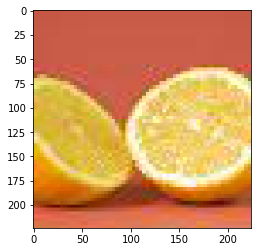

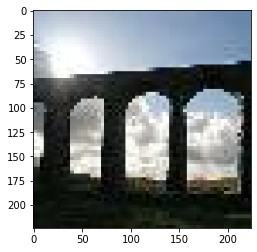

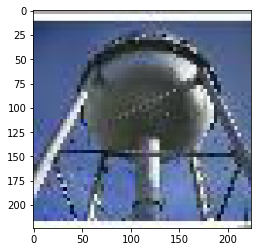

In [12]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

lemon_img = load_img('/content/lemon.jpg', target_size=(224, 224))
viaduct_img = load_img('/content/viaduct.jpg', target_size=(224, 224))
water_tower_img = load_img('/content/water_tower.jpg', target_size=(224, 224)) 
plt.imshow(lemon_img)
plt.figure()
plt.imshow(viaduct_img)
plt.figure()
plt.imshow(water_tower_img)


# Use ResNet50 model to classify the images

##We are going to get the top 5 predictions on each image. 

[Here](https://keras.io/api/applications/resnet/#resnet50-function) is written: 
**Note: each Keras Application expects a specific kind of input preprocessing. For ResNet, call tf.keras.applications.resnet.preprocess_input on your inputs before passing them to the model.**

So lets look at `tf.keras.applications.resnet.preprocess_input`:
```
tf.keras.applications.resnet.preprocess_input(
    x, data_format=None
)
```

* 1- The very first step is to use `img_to_array`:
```
tf.keras.preprocessing.image.img_to_array(
    img, data_format=None, dtype=None
)
```

In [20]:
from tensorflow.keras.preprocessing.image import img_to_array

x = img_to_array(lemon_img)
print(x)
print(f'x shape: {x.shape}')

[[[197.  88.  68.]
  [197.  88.  68.]
  [197.  88.  68.]
  ...
  [198.  89.  69.]
  [198.  89.  69.]
  [198.  89.  69.]]

 [[197.  88.  68.]
  [197.  88.  68.]
  [197.  88.  68.]
  ...
  [198.  89.  69.]
  [198.  89.  69.]
  [198.  89.  69.]]

 [[197.  88.  68.]
  [197.  88.  68.]
  [197.  88.  68.]
  ...
  [198.  89.  69.]
  [198.  89.  69.]
  [198.  89.  69.]]

 ...

 [[211. 119.  70.]
  [211. 119.  70.]
  [211. 119.  70.]
  ...
  [222. 128. 100.]
  [222. 128. 100.]
  [222. 128. 100.]]

 [[211. 119.  70.]
  [211. 119.  70.]
  [211. 119.  70.]
  ...
  [222. 128. 100.]
  [222. 128. 100.]
  [222. 128. 100.]]

 [[211. 119.  70.]
  [211. 119.  70.]
  [211. 119.  70.]
  ...
  [222. 128. 100.]
  [222. 128. 100.]
  [222. 128. 100.]]]
x shape: (224, 224, 3)


In [21]:
from tensorflow.keras.applications.resnet import preprocess_input

x = preprocess_input(x)
print(x)
print(f'x shape: ', x.shape)

[[[-35.939003  -28.779      73.32     ]
  [-35.939003  -28.779      73.32     ]
  [-35.939003  -28.779      73.32     ]
  ...
  [-34.939003  -27.779      74.32     ]
  [-34.939003  -27.779      74.32     ]
  [-34.939003  -27.779      74.32     ]]

 [[-35.939003  -28.779      73.32     ]
  [-35.939003  -28.779      73.32     ]
  [-35.939003  -28.779      73.32     ]
  ...
  [-34.939003  -27.779      74.32     ]
  [-34.939003  -27.779      74.32     ]
  [-34.939003  -27.779      74.32     ]]

 [[-35.939003  -28.779      73.32     ]
  [-35.939003  -28.779      73.32     ]
  [-35.939003  -28.779      73.32     ]
  ...
  [-34.939003  -27.779      74.32     ]
  [-34.939003  -27.779      74.32     ]
  [-34.939003  -27.779      74.32     ]]

 ...

 [[-33.939003    2.2210007  87.32     ]
  [-33.939003    2.2210007  87.32     ]
  [-33.939003    2.2210007  87.32     ]
  ...
  [ -3.939003   11.221001   98.32     ]
  [ -3.939003   11.221001   98.32     ]
  [ -3.939003   11.221001   98.32     ]]

 [

For prediction:

```
tf.keras.applications.resnet.decode_predictions(
    preds, top=5
)
```

In [22]:
from tensorflow.keras.applications.resnet import decode_predictions

preds = decode_predictions(model.predict(x), top=5)

ValueError: ignored

As it can be seen, we get the error:
**Input 0 is incompatible with layer resnet50: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)**

Therefore we need to add a dummy dimmension using `np.newaxis`

In [27]:
import numpy as np

x = img_to_array(lemon_img)[np.newaxis,...]
print(f'x shape: {x.shape}')

x shape: (1, 224, 224, 3)


In [28]:
x = preprocess_input(x)
print(f'x shape: {x.shape}')

x shape: (1, 224, 224, 3)


In [29]:
preds = decode_predictions(model.predict(x), top=5)

40960/35363 [==================================] - 0s 0us/step


In [30]:
print(preds)

[[('n07584110', 'consomme', 0.22780098), ('n07749582', 'lemon', 0.22175835), ('n07932039', 'eggnog', 0.15133499), ('n03633091', 'ladle', 0.04008823), ('n04286575', 'spotlight', 0.029197201)]]


Let's write the prediction in a dataframe format. Then first create an empty dataframe `top_pred`:

In [49]:
top_pred = pd.DataFrame(columns=["prediction", "probability"], index=(np.arange(5)+1))
top_pred

prediction probability
1        NaN         NaN
2        NaN         NaN
3        NaN         NaN
4        NaN         NaN
5        NaN         NaN

In [70]:
for i in range(5):
  prediction = preds[0][i][1]
  probability = preds[0][i][2]
  print(prediction, probability)

consomme 0.22780098
lemon 0.22175835
eggnog 0.15133499
ladle 0.04008823
spotlight 0.029197201


In [73]:
for i in range(5):
  top_pred.loc[i+1, "prediction"] = preds[0][i][1]
  top_pred.loc[i+1, "probability"] = preds[0][i][2] 
print(top_pred)

  prediction probability
1   consomme    0.227801
2      lemon    0.221758
3     eggnog    0.151335
4      ladle   0.0400882
5  spotlight   0.0291972


# Now let's put all together in a function

In [87]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.applications.resnet import decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
   x = img_to_array(img)[np.newaxis, ...]
   x = preprocess_input(x)
   preds = decode_predictions(model.predict(x), top=5)
   top_pred = pd.DataFrame(columns=["prediction", "probability"], index=np.arange(5)+1)
   for i in range(5):
     top_pred.loc[i+1]["prediction"] = preds[0][i][1]
     top_pred.loc[i+1]["probability"] = preds[0][i][2]
   return top_pred

In [94]:
print('Top 5 predictions for lemon image: \n\n {}'.format(get_top_5_predictions(lemon_img)))

Top 5 predictions for lemon image: 

   prediction probability
1   consomme    0.227801
2      lemon    0.221758
3     eggnog    0.151335
4      ladle   0.0400882
5  spotlight   0.0291972


In [95]:
print('Top 5 predictions for viaduct image: \n\n {}'.format(get_top_5_predictions(viaduct_img)))

Top 5 predictions for viaduct image: 

       prediction probability
1          vault    0.367951
2         prison    0.111742
3        viaduct    0.110737
4  window_screen   0.0882308
5    fire_screen   0.0206752


In [96]:
print('Top 5 predictions for Water tower image: \n\n {}'.format(get_top_5_predictions(water_tower_img)))

Top 5 predictions for Water tower image: 

       prediction probability
1     solar_dish    0.384682
2          ladle    0.196178
3    planetarium    0.116682
4       strainer   0.0499899
5  jigsaw_puzzle   0.0219474
